# Basic Plotting with `pandas`

## In this section, we'll cover

- The difference between exploratory and explanitory plots
- How to make basic plots directly from `pandas` using the `plot` family of functions
- Review several plotting examples to show some of the basic plots you can make with `pandas`

## Data Visualization Helps you Understand and Communicate Data

Visualizing data is one of the most important things you can do to better understand the data you're working with.  While looking at tables, computing statistical summaries, fitting models, etc. can give you important insight into a data set, even simple visualizations can often help you to understand data more effectively than other methods.  Anyone who works with data will need to become proficient at producting data visualizations.

Data visualization is sometimes split into to categories, based on their aims and intended audiences:

- **Exploratory**: data visualizations that are produced in order to help the data analyst understand what's there, how the data is structured, if there are patterns, if there are problems, etc.  Exploratory visualizations are often produced frequently and quickly during the course of an analysis since their aim is to help one understand what might be in the data.
- **Explanitory**: data visualizations that are produced in order to convey a message that's represented or supported by the underlying data. Explanitory visualizations are often produced after you understand what's in the data and what message you want to communicate.  Explanitory visualizations usually take longer to make and are more polished than exploratory visualizations.

In this section, we'll cover focus mainly on exploratory visualizations so that we can focus on the coding syntax and approaches to quickly create plots from data.

## Data Visualization in Python and `pandas`

Python has a rich ecosystem of packages for making data visualizations.  Some of the most well known include:
- [matplotlib](https://matplotlib.org)
- [seaborn](https://seaborn.pydata.org)
- [Bokeh](https://docs.bokeh.org/en/latest/index.html)
- [Plotly](https://plotly.com/python/)
- and many, many others...

Chosing a visualization library is largely one of preference and where/how you intend to use it (e.g. as static images, as interactive graphic, use on the web), and its ofen helpful to learn several.  

One option for generating quick visualizations is to use the plotting capabilities built into `pandas`.  On the backend, `pandas` uses the `matplotlib` library, and allows you to produce plots by calling methods from `Series` and `DataFrame` objects.  For the examples here, we'll use the penguins data set we've used in the previous sections.

In [1]:
# This line is needed so we can see matlibplot plots in the Jupyter notebook interface
%matplotlib inline

# We need to import both pandas AND matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Read the penguins dataset (provideed by Allison Horst)
# https://github.com/allisonhorst/palmerpenguins
penguins = pd.read_csv("https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv")

## The `plot` function is the basis for making plots with `pandas`

`pandas` provides a high-level `plot` function that can be called from `Series` or `DataFrame` objects to quickly produce a large variety of plots.  First, let's see what happens when we use `plot` with our penguins data:

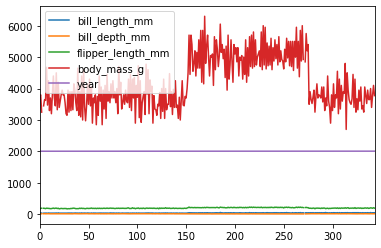

In [2]:
penguins.plot()

That visualization isn't the most useful, but it does demonstrate what the default `plot` does with no other arguments provided.  Here, it produced a line plot for each of the columns in the `DataFrame` that had numeric values.  This particular visualization is not very useful because the scales for these variables are all different and it doesn't make a lot of sense to plot them all on the same set of axes.  However in certain cases, this default behavior can be useful to quickly make a plot of your data.

In most cases, it useful to provide the `plot` function with more specific information about what kind of plot you're trying to make and what variables you want to use.  As a first example, let's make a scatter plot of penguin bill length versus penguin bill depth:

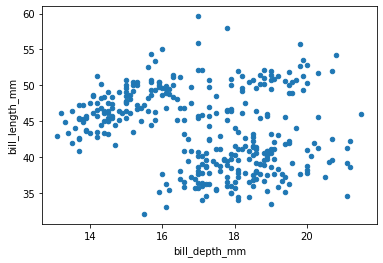

In [3]:
# The argument syntax is: 
# column name for the data point position along the x-axis
# column name for the data point position along the y-axis
# what kind of plot to make
penguins.plot("bill_depth_mm", "bill_length_mm", kind="scatter")

Since the kind of plot is an important factor that drives the visualization, there is an alternative plotting syntax that puts the kind of plot up front in the

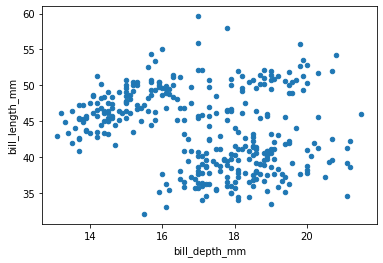

In [4]:
penguins.plot.scatter("bill_depth_mm", "bill_length_mm")

The general pattern here is to use `DataFrame or Series Object` + `.plot` + `.PLOT_KIND`.  Some of the main plot kinds supported by `pandas` are:
- `scatter`
- `bar`
- `hist` (histogram)
- `box` (boxplot)
- ... many others

When working with most any data set, it's often useful to look at how the various variables in the data are distributed. We can easily do that in `pandas` by first selecting the column of interest, then calling the plot function:

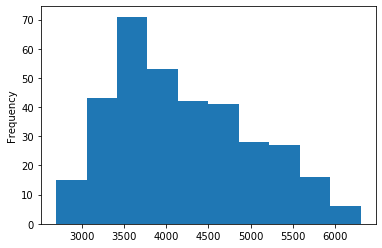

In [5]:
penguins["body_mass_g"].plot.hist()

Making a boxplot from the same data data simply requires a change to the plot type:

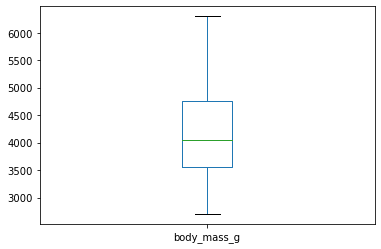

In [6]:
# Just change hist to box
penguins["body_mass_g"].plot.box()

We can also combine our knowledge of how to subset data in `pandas` to look at distributions for particular types of penguin species:

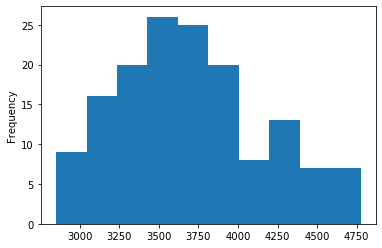

In [7]:
# Here, we use the loc indexing function to filter to a specific species and select the body mass column
penguins.loc[penguins["species"]=="Adelie", "body_mass_g"].plot.hist()

The above examples looked at the distributions for individual numeric data.  An analogous plot for categorical-type data can be produced as follows:

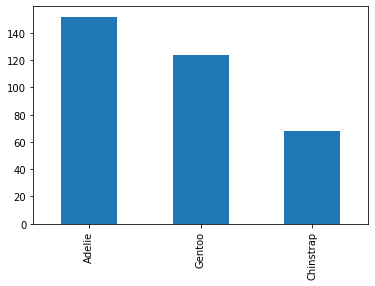

In [8]:
# Species is a string column containing 3 different penguin species
# We can count up how many times each appears using the value_counts function
# then display as a bar plot
penguins["species"].value_counts().plot.bar()

`value_counts` is a useful function from `pandas` that we haven't yet covered.  There are lots of other `pandas` function that are worth learning about.  See the `pandas` documentation and tutorials for more information.

## Plots for Comparing Different Data Subsets

In the above examples, we our plots focused on diplaying data from a single set (or subset) of data.  However, it's often very useful to generate plots that compare data between sets.  For example, the following plot shows the distribution of bill lengths for each of the three species of penguins:

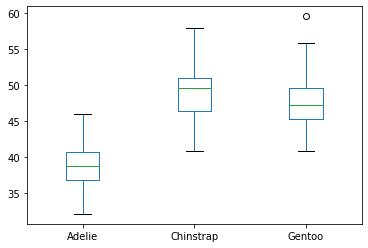

In [9]:
# pandas need the comparison groups to each be in their own columns
# Use pivot for this where columns represents the column with the set groupings
# and values represents the values you want to plot
penguins.pivot(columns="species", values="bill_length_mm").plot.box()

The above syntax for making this plot might seen a bit odd since we have to first pivot the data (to wide format) before plotting.  The main thing to note is that for plots like these, `pandas` needs the comparison groups arranged in their own columns.  In this case, we need individual columns for each of the 3 penguin species.  In the long format that the data is provided in, there is a single column called `species` so we need to pivot this data to wide format based on this column, and we select the values to be `bill_length_mm`.

This works for other types of plots as well.  For example we can produce histograms instead:

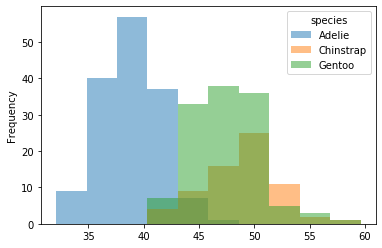

In [10]:
# Just change box to hist
# Notice the use of alpha in hist -- try running without this argument
penguins.pivot(columns="species", values="bill_length_mm").plot.hist(alpha=0.5)

Variations on these plots can be easily made by specifying different subset groups and values to plot.  For example we can compare the distributions of body mass by island as follows:

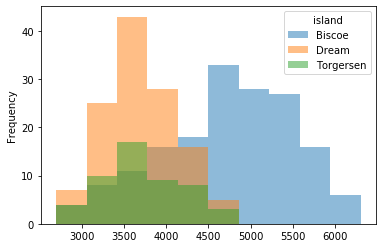

In [11]:
penguins.pivot(columns="island", values="body_mass_g").plot.hist(alpha=0.5)

## Saving Plots to a File

Saving a plot to a file requires a little bit of setup:

1. Get a plot area ready and specify the output size
2. Generate the plot like above; note the additional use of the `ax` argument using the axes we got from step 1.
3. Optionally, add additional modifications to the plot; here we need to label the x-axis
4. Save the figure; the file will go to your current working directory for your notebook

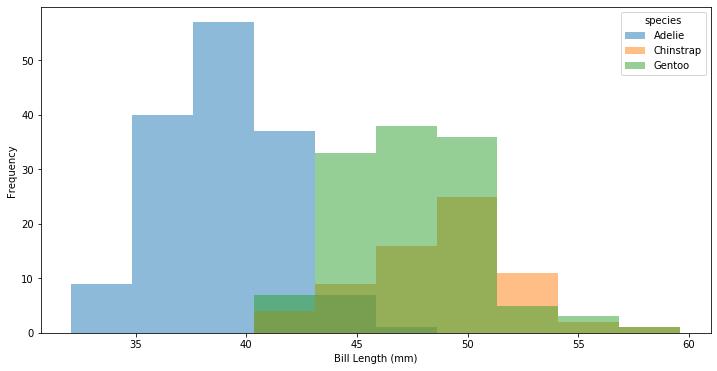

In [12]:
fig, axs = plt.subplots(figsize=(12, 6))
penguins.pivot(columns="species", values="bill_length_mm").plot.hist(ax=axs, alpha=0.5)
axs.set_xlabel("Bill Length (mm)")
fig.savefig("bill_length_distributions.png")

## Final Thoughts

`pandas` provides several ways to make quick plots that work great for exploratory-type visulizations.  However, you'll likely find yourself eventually wanting more power and control in the plots you make that goes beyond what `pandas` provides.  Fortunately, there are lots of great plotting libraries in Python like the ones noted at the beginning of this section.  Try some of them out to see what works best for you (`seaborn` gets high marks).

## Main Points

- Data visualization is a key piece of any data analysis workflow.
- `pandas` provides several functions for making quick plots that are well suited for exploratory visualization
- Data from `pandas` `DataFrames` can we plotted using the `plot.*` family of functions (where * = {scatter, box, hist, etc, ...})
- Data subsetting and reformatting (`pivot`, `melt`) can be used to prepare data for different kinds of views and comparisons